<a href="https://colab.research.google.com/github/fares-mldev/uns-pdi2021/blob/main/tp2/PDI_TP_2_Color_spaces_and_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PDI TP 2 - Color spaces & maps

###Primera parte (Color spaces)
Manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

*Observaciones: para cada uno estos mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.*

1. Normalizar los valores de RGB del pixel
2. RGB -> YIQ (utilizando la segunda matriz)
3. Y’ := aY ;
4. I’ := bI ; Q’ := bQ ;
5. Chequear que Y’ <= 1 (para que no se vaya de rango)
6. Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
8. Convertir R’G’B’ a bytes y graficar el pixel

###Segunda parte (Color maps)
Utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.

Objetivo: Comparar cómo se aprecian ciertos detalles de una imagen diferentes paletas de colores, sin necesidad de modificar el contenido de la misma.

#Part 1: Color Spaces

In [3]:
#@title Imports

# Import numpy
import numpy as np

# Import imageio
import imageio as iio

# Import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [4]:
#@title Image utils

# Images URL list 
url_dict = {}
url_dict["Pencils"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp2/img/Pencils.jpg"
url_dict["dem1"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp2/img/dem1.jpg"
url_dict["dem2"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp2/img/dem2.jpg"
url_dict["dem3"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp2/img/dem3.jpg"
url_dict["thermal1"] ="https://github.com/fares-mldev/uns-pdi2021/raw/main/tp2/img/thermal1.jpg"
url_dict["thermal2"] ="https://github.com/fares-mldev/uns-pdi2021/raw/main/tp2/img/thermal2.jpg"

def get_image(image: str) -> np.array:
    '''
    Downloads specified image from the web and returns it as a numpy array
    '''
    # Read image from file
    img = iio.imread(url_dict[image])

    # Return image
    return np.asarray(img)

def describe_img(img: np.array):
  '''
  Prints image properties
  '''
  print("Image shape (height,width,channels):", img.shape)
  print("Element type:", img.dtype)
  print("Total number of pixels:",img.size)
  print("Pixels per channel:", int(img.size/img.shape[2]))
  print("min-max value of channel 0:",img[:,:,0].min(),img[:,:,0].max())
  print("min-max value of channel 1:",img[:,:,1].min(),img[:,:,1].max())
  print("min-max value of channel 2:",img[:,:,2].min(),img[:,:,2].max())

def plot_img(img: np.array):
  '''
  Plots image using matplotlib 
  '''

  plt.figure(figsize=(10, 10))
  plt.imshow(img)

def plot_map(map: np.array, fig:plt.figure, ax: plt.axes, cmap = "gray", vmin = 0, vmax =1):
  '''
  Plots a single layer according to the specified colormap, in the specified axis 
  '''  

  im = ax.imshow(map, cmap=cmap, vmin=vmin, vmax=vmax)
  ax.axis('off')
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  fig.colorbar(im, cax=cax, orientation='vertical')

def plot_yiq(img: np.array):
  '''
  Plots image channels in separate figures 
  '''
  
  # Set figure properties
  fig = plt.figure(figsize=(20, 80))
  fig.tight_layout()

  # RGB 
  axRGB = fig.add_subplot(141)
  axRGB.imshow(convert_yiq2rgb(img))
  axRGB.set_title("RGB")

  # Y Channel
  axY = fig.add_subplot(142)
  axY.set_title("Luminance (Y)")
  plot_map(img[:,:,0], fig=fig, ax=axY, vmin = 0 , vmax = 2)

  # I Channel
  axI = fig.add_subplot(143)
  axI.set_title("Chrominance (I)")
  plot_map(img[:,:,1], fig=fig, ax=axI, cmap = "RdYlGn", vmin = -0.5957 , vmax = 0.5957)

  # Q Channel
  axQ = fig.add_subplot(144)
  axQ.set_title("Chrominance (Q)")
  plot_map(img[:,:,2], fig=fig, ax=axQ, cmap = "RdYlGn", vmin = -0.5226 , vmax = 0.5226)

  


In [6]:
#@title Color space transformation utils

# RGB to YIQ space transformation matrix
rgb_to_yiq = [[0.299, 0.587, 0.114],
              [0.595716, -0.274453, -0.321263],
              [0.211456, -0.522591, 0.311135]]

# YIQ to RGB space transformation matrix
yiq_to_rgb = [[1, 0.9663, 0.6210],
              [1, -0.2721, -0.6474],
              [1, -1.1070, 1.7046]]

def convert_rgb2yiq(img_rgb: np.array) -> np.array:
  '''
  Converts an RGB image to YIQ space
  '''
  
  # Normalize image
  img_rgb_n = img_rgb.astype(np.float64) / 255.0  
  
  # Apply transformation
  img_yiq = np.dot(img_rgb_n,rgb_to_yiq)

  # Return YIQ image
  return img_yiq

def convert_yiq2rgb(img_yiq: np.array) -> np.array:
  '''
  Converts an YIQ image to RGB space
  '''

  # Apply transformation
  img_rgb_n= np.dot(img_yiq,yiq_to_rgb)
  
  # Clip image 
  img_rgb = img_rgb_n.clip(0,1) * 255.0
  
  # Return RGB image
  return img_rgb.astype(np.uint8) 

def build_iq_space(y: np.float64):
  '''
  Creates a standard YIQ pattern
  '''
  # Range of I, Q values
  i = np.linspace(-0.5957 ,0.5957, num=500) 
  q = np.linspace(-0.5226 ,0.5226, num=500)

  # Build I, Q channels
  mi, mq = np.meshgrid(i, q)

  # Y channel
  y = np.ones(mi.shape) * y

  # Build image
  pattern_yiq = np.stack([y,mi,np.flip(mq, axis=0)], axis=2)
  
  return pattern_yiq

def plot_iq_space(pattern_yiq: np.array):
  '''
  Plots a YIQ pattern 
  '''
  # Plot space
  plt.figure(figsize=(8, 8))
  plt.imshow(convert_yiq2rgb(pattern_yiq),extent=[-0.5957 ,0.5957, -0.5226 ,0.5226])
  plt.title("Chrominance IQ space")
  plt.xlabel("I")
  plt.ylabel("Q")

def transform(img: np.array, kY = 1.0, kIQ = 1.0) -> np.array:
  '''
  Apply following transformations in YIQ space:
  Y' = kY * Y 
  I' = kIQ * I
  Q' = kIQ * Q
  
  Then clip between following values:
  Y between (0,1)
  I between (-0.5957 ,0.5957)
  Q between (-0.5226 ,0.5226)
  '''
  
  # Create transformed image
  ret_img = np.empty_like(img.astype(np.float64))

  # Modify Y channel
  ret_img[:,:,0] = img[:,:,0] * kY
  
  # Modify Y channel
  ret_img[:,:,1] = img[:,:,1] * kIQ
  ret_img[:,:,2] = img[:,:,2] * kIQ

  # Clip Y channel  
  ret_img[:,:,0]= ret_img[:,:,0].clip(0,1)
  
  # Clip I channel
  ret_img[:,:,1] = ret_img[:,:,1].clip(-0.5957 ,0.5957)
  
  # Clip Q channel
  ret_img[:,:,2] = ret_img[:,:,2].clip(-0.5226 ,0.5226)

  # Return transformed image
  return ret_img

##YIQ space
First lets familiarize with the YIQ space: Lets generate a sweep of chrominance I and Q channels from -0.5957 to 0.5957 and -0.5226 ,0.5226 repectively.

Luminance (Y) will be kept constant at 0.5. Once generated, we convert it to RGB and plot it. I channel is plotted on the x-axis while the Q channel is plotted on the y-axis. Observe the axis labels for the respective I/Q values

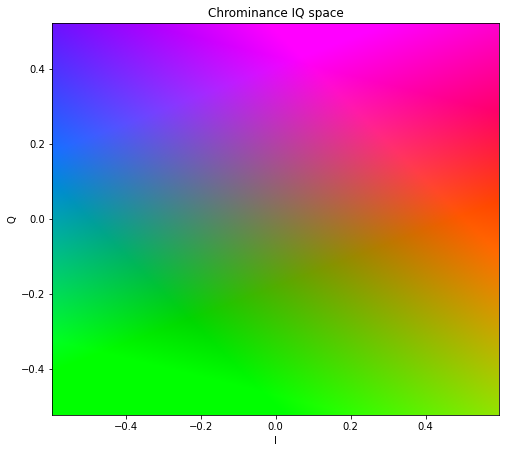

In [7]:
#@title 

# Build IQ space for Y = 0.5
iq_space = build_iq_space(0.5)

# Plot IQ space
plot_iq_space(iq_space)


###Try other luminance values!  
As luminance increases, we get the color white in the center (low chrominances), while when luminance decreases, we get color black in the same region.

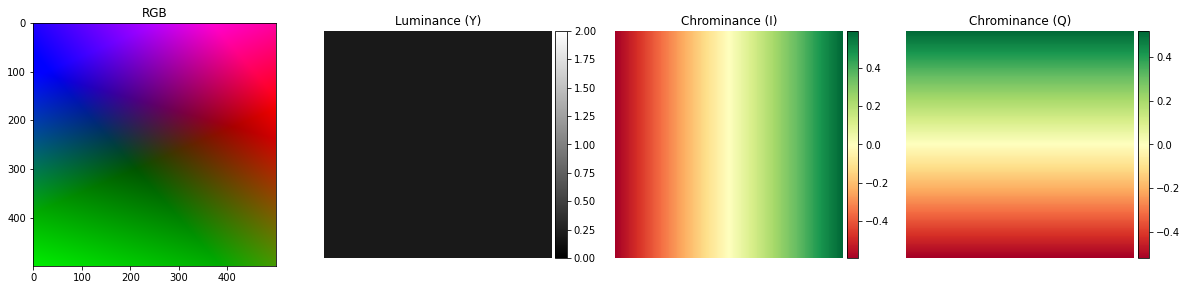

In [18]:
#@title Select Y value { run: "auto" }

Y = 0.2 #@param {type:"slider", min:0, max:2, step:0.1}

# Build 
iq_space = build_iq_space(Y)

# Plot layers
plot_yiq(iq_space)

##Input image
Now lets try with a real image

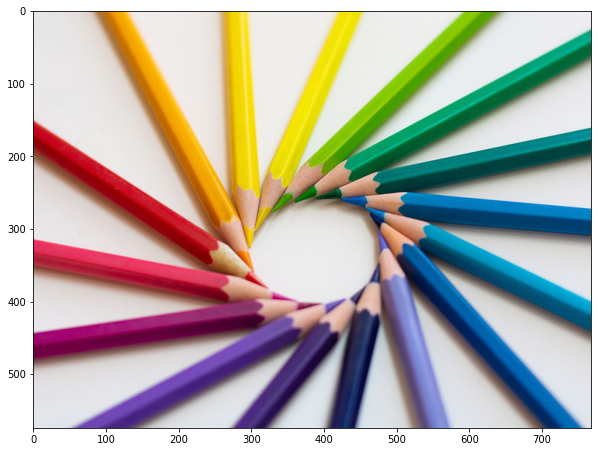

In [9]:
#@title Load image

# Get image
img_rgb = get_image("Pencils")

# Plot image
plot_img(img_rgb)

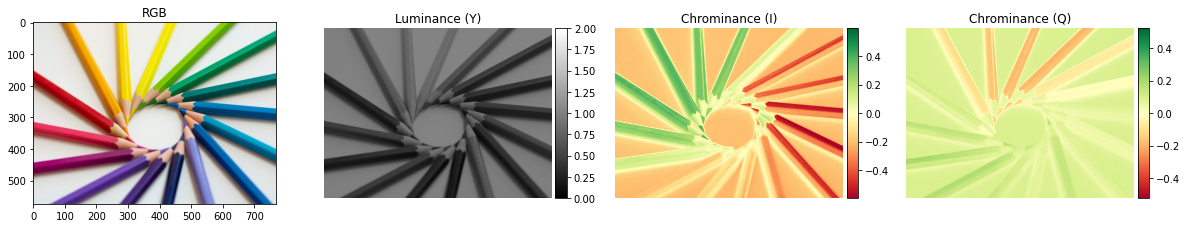

In [10]:
#@title Convert to YIQ space and view channels

# Apply transformation
img_yiq = convert_rgb2yiq(img_rgb)

# Plot layers
plot_yiq(img_yiq)

##Transform Image in YIQ color space

Once the image is in YIQ space we scale the Y channel by the kY parameter and de I&Q channels by the kIQ parameter.

We perform a 2d sweep of both parameters. The central image (kY=kIQ=1) is the original image.

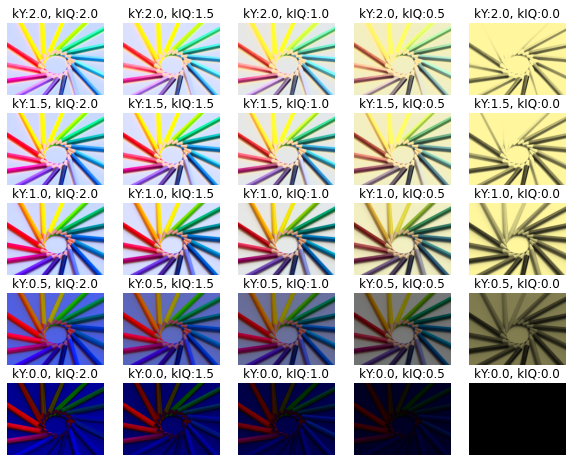

In [ ]:
#@title 2D sweep in (kY,kIQ) space

# Range of Y, I, Q scale change
kYs = np.linspace(2, 0, num=5) 
kIQs = np.linspace(2, 0, num=5)

# Set figure properties
fig, axes = plt.subplots(len(kYs), len(kIQs))
fig.set_size_inches(10,8)

# Sweep through different luminance and chrominance values
for idx_Y, kY in enumerate(kYs):
  for  idx_IQ, kIQ in enumerate(kIQs):
    img_yiq_t = transform(img_yiq,kY=kY,kIQ=kIQ)
    axes[idx_Y,idx_IQ].imshow(convert_yiq2rgb(img_yiq_t))
    axes[idx_Y,idx_IQ].axis('off')
    axes[idx_Y,idx_IQ].set_title("kY:" + str(kY) + ", kIQ:" + str(kIQ) )

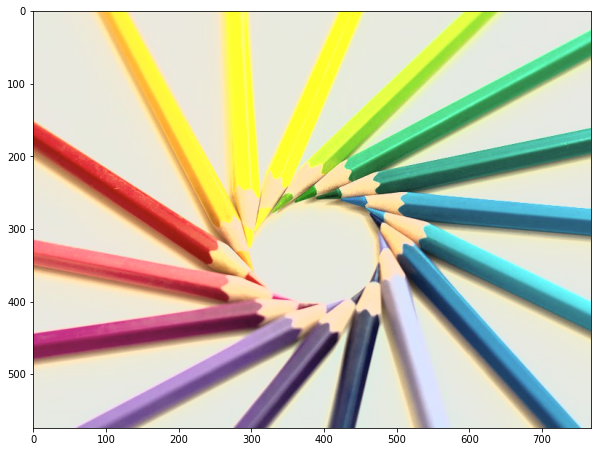

In [11]:
#@title Try other values!   { run: "auto" }

kY = 1.6 #@param {type:"slider", min:0, max:2, step:0.1}
kIQ = 0.9 #@param {type:"slider", min:0, max:2, step:0.1}

img_yiq_t = transform(img_yiq, kY, kIQ)
img_rgb_t = convert_yiq2rgb(img_yiq_t)
plot_img(img_rgb_t)

##Conclusions

We could appreciate how luminance and chrominance behave: Increasing crominance makes colors more vivid, even with very low values of Luminance. Decreasing chrominance, on the other hand leads to less saturated tones. Luminance controls the brightness of the image. With low chrominance, high luminance values tend to color white, while low luminance gives color black.

We could also confirm that the transformations to and from the YIQ space allowed us to easily adjust specific characteristics of the image that would have been difficult working in the RGB space


#Part 2: Color Maps

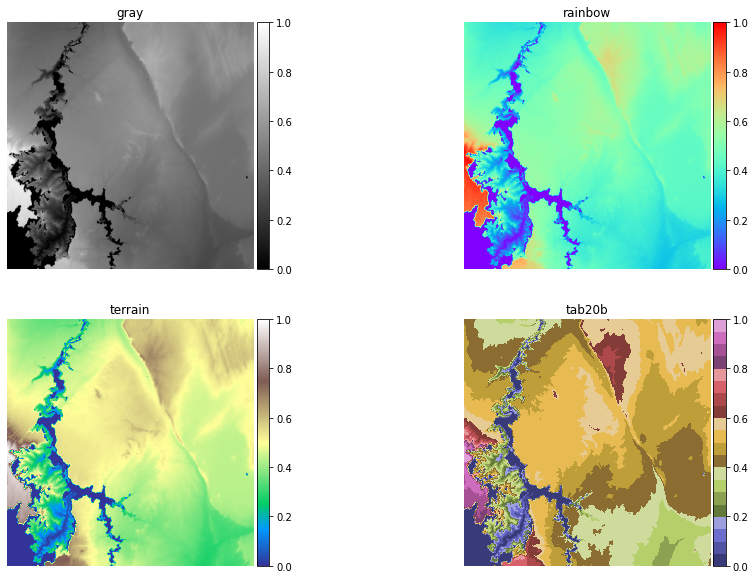

In [15]:
#@title Digital elevation map image  { run: "auto" }
#@markdown We compare four different maps for a digital elevation map (DEM) image. 
#@markdown The grayscale map has very poor constrast in homogeneous regions.
#@markdown The "rainbow" gives good contrast between limit values but vanishes differences in intermediate values.
#@markdown The "terrain" map gives a natural feeling of different elevation values, while the "tab20" map 
#@markdown highlights the regions with similar properties.

# Select images
image = "dem1" #@param ["dem1", "dem2", "dem3"]

# Get image
img_rgb = get_image(image)

# Keep only one channel
img_map = img_rgb[:,:,0] / 255.0 

# Set figure properties
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,10)

axes[0,0].set_title("gray")
plot_map(img_map, fig=fig,ax=axes[0,0])

axes[0,1].set_title("rainbow")
plot_map(img_map, fig=fig,ax=axes[0,1], cmap="rainbow")

axes[1,0].set_title("terrain")
plot_map(img_map, fig=fig,ax=axes[1,0], cmap="terrain")

axes[1,1].set_title("tab20b")
plot_map(img_map, fig=fig,ax=axes[1,1], cmap="tab20b")


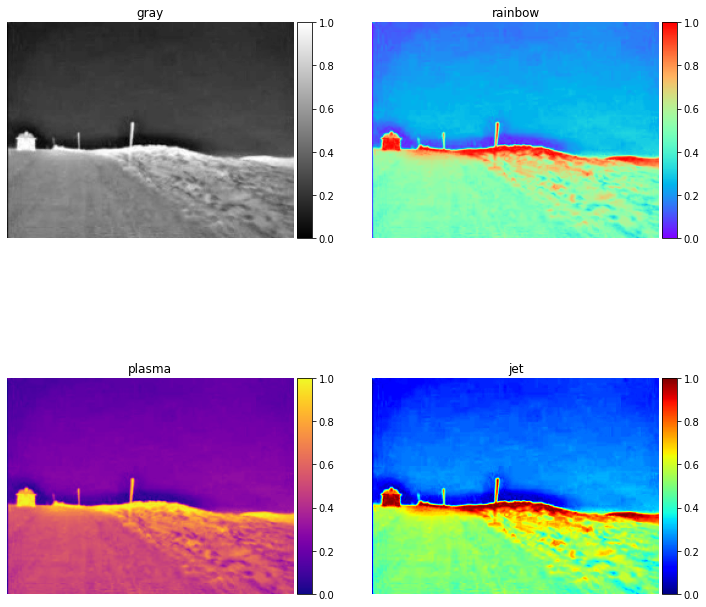

In [14]:
#@title Thermal image  { run: "auto" }
#@markdown We compare four different maps for a thermal image. 
#@markdown The grayscale map has very poor constrast in the temperature differences in homogeneous regions.
#@markdown The "rainbow" and "plasma" give a slightly better view of the details.
#@markdown The "jet" has the best contrast of slight temperature changes.

image = "thermal1" #@param ["thermal1", "thermal2"]

# Get image
img_rgb = get_image(image)

# Keep only one channel
img_map = img_rgb[:,:,0] / 255.0 

# Set figure properties
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12,12)

axes[0,0].set_title("gray")
plot_map(img_map, fig=fig,ax=axes[0,0])

axes[0,1].set_title("rainbow")
plot_map(img_map, fig=fig,ax=axes[0,1], cmap="rainbow")

axes[1,0].set_title("plasma")
plot_map(img_map, fig=fig,ax=axes[1,0], cmap="plasma")

axes[1,1].set_title("jet")
plot_map(img_map, fig=fig,ax=axes[1,1], cmap="jet")


##Conclusions

We could appreciate how the correct choice of a color map allows to appreciate specific characteristics of a grayscale image. Continous maps give a more natural perception but with less contrast, while discrete maps give a clustering-like feeling by highlighting similar regions.  